### Evaluate baseline model

In [1]:
import keras
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np

model = load_model('/home/ec2-user/Telecom/experiments/saved_models/keras_cnn_imagenette_trained_model.h5')

test_datagen = ImageDataGenerator(rescale=1./255)
test_dir = "/home/ec2-user/Telecom/experiments/data/imagenette2-320/val"

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(160, 160),
        batch_size=1,
        class_mode='categorical',
        shuffle= False)

filenames = validation_generator.filenames
nb_samples = len(filenames)

Using TensorFlow backend.
/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 =

/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.d


Found 3925 images belonging to 10 classes.


In [7]:
predict = model.predict_generator(validation_generator,nb_samples, workers=3, verbose=1)

files = np.array(filenames).reshape(len(filenames),1)
file_pred = np.concatenate((files,predict),axis=1)
pred_df = pd.DataFrame(file_pred)

classes_dict = validation_generator.class_indices
pred_df.columns = ['path']+list(classes_dict.keys())


#evaluate = model.evaluate_generator(validation_generator,nb_samples, workers=3, verbose=1)

#print('model validation accuracy %s'% evaluate[1])

Using TensorFlow backend.
/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 =

/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.d


Found 3925 images belonging to 10 classes.
3925/3925 [==============================] - 70s 18ms/step


In [8]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 160, 160, 32)      896       
_________________________________________________________________
activation_74 (Activation)   (None, 160, 160, 32)      0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 158, 158, 32)      9248      
_________________________________________________________________
activation_75 (Activation)   (None, 158, 158, 32)      0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 79, 79, 32)        0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 79, 79, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 79, 79, 64)       

In [27]:
# get total number of parameters per layer
total_weights = sum([layer.count_params() for layer in model.layers])
for layer in model.layers :
    nb_weights = layer.count_params()
    if nb_weights > 0:
        perc = np.round(100*float(nb_weights)/total_weights,2)
        print('Layer %s - nb parameters : %s - perc of total : %s ' % (layer.name,nb_weights,perc ))

Layer conv2d_61 - nb parameters : 896 - perc of total : 0.01 
Layer conv2d_62 - nb parameters : 9248 - perc of total : 0.1 
Layer conv2d_63 - nb parameters : 18496 - perc of total : 0.19 
Layer conv2d_64 - nb parameters : 36928 - perc of total : 0.39 
Layer conv2d_65 - nb parameters : 73856 - perc of total : 0.77 
Layer conv2d_66 - nb parameters : 147584 - perc of total : 1.54 
Layer conv2d_67 - nb parameters : 295168 - perc of total : 3.09 
Layer conv2d_68 - nb parameters : 590080 - perc of total : 6.17 
Layer dense_20 - nb parameters : 8389120 - perc of total : 87.69 
Layer dense_21 - nb parameters : 5130 - perc of total : 0.05 


**The bulk of the model parameters are in the first Dense layer, intuition tells us that pruning the last convolution layers will have the most impact to reduce the model size**

# Model Pruning with Keras Surgeon

### 0) Visualizing Convolution filters to check for redundancy of filters

In [62]:
# Feature activation maps for 1st layer
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot as plt
from numpy import expand_dims

# redefine model to output right after the first hidden layer
model2 = Model(inputs=model.inputs, outputs=model.layers[3].output)
model2.summary()
# load the image with the required shape
img = load_img('/home/ec2-user/Telecom/experiments/data/imagenette2-320/val/n02102040/ILSVRC2012_val_00017370.JPEG', target_size=(160, 160))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model2.predict(img)


Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61_input (InputLayer) (None, 160, 160, 3)       0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 160, 160, 32)      896       
_________________________________________________________________
activation_74 (Activation)   (None, 160, 160, 32)      0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 158, 158, 32)      9248      
_________________________________________________________________
activation_75 (Activation)   (None, 158, 158, 32)      0         
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


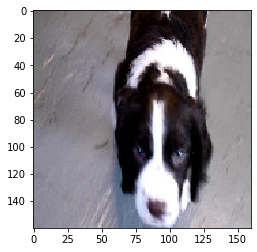

In [54]:
img = load_img('/home/ec2-user/Telecom/experiments/data/imagenette2-320/val/n02102040/ILSVRC2012_val_00017370.JPEG', target_size=(160, 160))
plt.imshow(img)

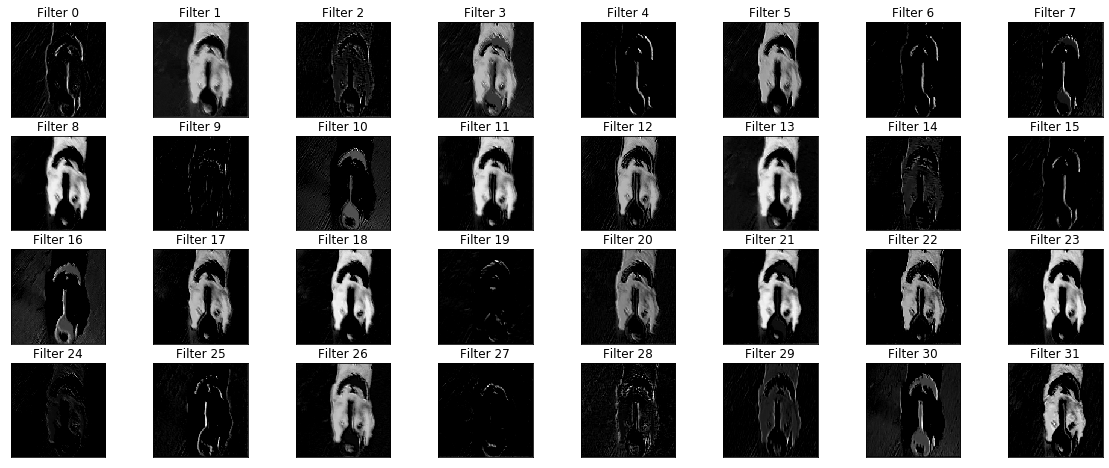

In [63]:
fig = plt.figure(figsize=(20, 8))

for i in range(32):
    # specify subplot and turn of axis
    ax = fig.add_subplot(4, 8, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Filter %s' % i)
    # plot filter channel in grayscale
    plt.imshow(feature_maps[0, :, :, i], cmap='gray')
# show the figure
plt.show()

### 1) Removing filters with lowest L1 Norm

In [7]:
import math
#compute and plot filter L1 norm of the filters
layer_index = 0
print('Pruning layer %s ' % model.layers[layer_index].name)
weights = model.layers[layer_index].get_weights()[0]
num_filter = len(weights[0,0,0,:])
norms_dict = {}
norms = []
pruning_perc = 10
nb_pruned = math.floor((pruning_perc * num_filter)/100.)
for i in range(num_filter):
    l1_norm = np.sum(abs(weights[:,:,:,i]))
    norms_dict['filter_%s'% str(i+1)] = l1_norm
    norms.append(l1_norm)

to_prune = np.argsort(norms)[:nb_pruned]
print('Filters to prune %s' % to_prune)

Pruning layer conv2d_61 
Filters to prune [4 8 6]


In [8]:
from kerassurgeon import identify
from kerassurgeon.operations import delete_channels, delete_layer
from keras.callbacks import ModelCheckpoint
import os

opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

model_pruned = delete_channels(model, model.layers[layer_index], to_prune)
model_pruned.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Deleting 3/32 channels from layer: conv2d_61


In [15]:
from keras.callbacks import ModelCheckpoint
import os
# Retraining for a few epochs
save_dir = '/home/ec2-user/Telecom/experiments/saved_models'
model_name = 'keras_cnn_imagenette_pruned_model.h5'
model_path = os.path.join(save_dir, model_name)
train_path = '/home/ec2-user/Telecom/experiments/data/imagenette2-320/train'
test_path = '/home/ec2-user/Telecom/experiments/data/imagenette2-320/val'

# The data, split between train and test sets:
train_datagen = ImageDataGenerator(
        rescale=1./255,    
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(160, 160),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(160, 160),
        batch_size=32,
        class_mode='categorical')

model_checkpoint = ModelCheckpoint(model_path, monitor='loss', verbose=1, save_best_only=True)


model_pruned.fit_generator(
          train_generator,
          epochs=,
          validation_data=validation_generator,
          steps_per_epoch = 300,
          validation_steps = 150,
          verbose = 1,
          callbacks=[model_checkpoint]
)


Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.


In [16]:
def prune_and_train(model, layer_ix, perc_pruned, save_model_path, epochs=1):
    
    print('Pruning layer %s ' % model.layers[layer_ix].name)
    weights = model.layers[layer_ix].get_weights()[0]
    num_filter = len(weights[0,0,0,:])
    norms_dict = {}
    norms = []
    nb_pruned = math.floor((perc_pruned * num_filter)/100.)
    for i in range(num_filter):
        l1_norm = np.sum(abs(weights[:,:,:,i]))
        norms_dict['filter_%s'% str(i+1)] = l1_norm
        norms.append(l1_norm)

    to_prune = np.argsort(norms)[:nb_pruned]
    print('Filters to prune %s' % to_prune)
    model_pruned = delete_channels(model, model.layers[layer_ix], to_prune)
    model_pruned.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
    
    model_checkpoint = ModelCheckpoint(saved_model_path, monitor='loss', verbose=1, save_best_only=True)

    model_pruned.fit_generator(
          train_generator,
          epochs=epochs,
          validation_data=validation_generator,
          steps_per_epoch = 300,
          validation_steps = 150,
          verbose = 1,
          callbacks=[model_checkpoint]
    )

    return model_pruned


#### 1. Pruning first convolutionnal layer

In [17]:
from kerassurgeon import identify
from kerassurgeon.operations import delete_channels, delete_layer
from keras.callbacks import ModelCheckpoint
import os
import math

# Retraining for a few epochs
save_dir = '/home/ec2-user/Telecom/experiments/saved_models'
train_path = '/home/ec2-user/Telecom/experiments/data/imagenette2-320/train'
test_path = '/home/ec2-user/Telecom/experiments/data/imagenette2-320/val'

# The data, split between train and test sets:
train_datagen = ImageDataGenerator(
        rescale=1./255,    
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(160, 160),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(160, 160),
        batch_size=32,
        class_mode='categorical')

opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

layer_ix = 0
method = 'l1'
perf = []
pruned_percentages = range(10,60,10)
for perc in pruned_percentages:
    model_name = 'keras_cnn_imagenette_model_{0}_layer{1}_{2}pruned.h5'.format(method, layer_ix, perc)
    saved_model_path = os.path.join(save_dir, model_name)
    model_pruned = prune_and_train(model, layer_ix, perc, saved_model_path, epochs=1)
    evaluate = model_pruned.evaluate_generator(validation_generator,nb_samples, workers=3, verbose=1)
    print('model validation accuracy %s'% evaluate[1])
    perf.append(evaluate[1])

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.
Pruning layer conv2d_61 
Filters to prune [4 8 6]
Deleting 3/32 channels from layer: conv2d_61
Epoch 1/1
300/300 [==============================] - 706s 2s/step - loss: 0.7401 - accuracy: 0.8007 - val_loss: 1.1701 - val_accuracy: 0.7469

Epoch 00001: loss improved from inf to 0.74007, saving model to /home/ec2-user/Telecom/experiments/saved_models/keras_cnn_imagenette_model_l1_layer0_10pruned.h5
3925/3925 [==============================] - 1741s 444ms/step
model validation accuracy 0.7495110034942627
Pruning layer conv2d_61 
Filters to prune [ 4  8  6 25 13  0]
Deleting 6/32 channels from layer: conv2d_61
Epoch 1/1
300/300 [==============================] - 673s 2s/step - loss: 0.7612 - accuracy: 0.7977 - val_loss: 0.8300 - val_accuracy: 0.7584

Epoch 00001: loss improved from inf to 0.76117, saving model to /home/ec2-user/Telecom/experiments/saved_models/keras_cnn_imagenette_model_l1_layer0_20pruned.

Text(0.5, 0, 'Percent filters pruned in 1st layer')

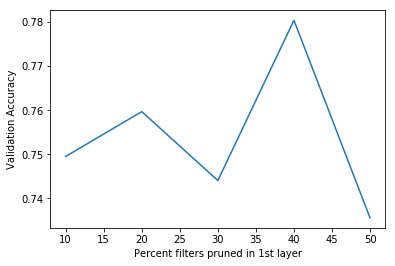

In [26]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(pruned_percentages, perf)
plt.ylabel('Validation Accuracy')
plt.xlabel('Percent filters pruned in 1st layer')

In [33]:
model_sizes = []
total_weights = sum([layer.count_params() for layer in model.layers])

for i in range(len(pruned_percentages)):
    model_path = '/home/ec2-user/Telecom/experiments/saved_models/keras_cnn_imagenette_model_l1_layer0_{0}pruned.h5'.format(pruned_percentages[i])
    foo = load_model(model_path)
    nb_weights = sum([layer.count_params() for layer in foo.layers])
    model_sizes.append(nb_weights)
    reduction = 100*float(nb_weights - total_weights) / total_weights
    print('Pruned percentage : {0} - nb of weights : {1} - perc reduction : {2} - perf : {3}'.format(pruned_percentages[i], 
                                                                                                     nb_weights,
                                                                                                    reduction,
                                                                                                    perf[i])
         )


Pruned percentage : 10 - nb of weights : 9565558 - perc reduction : -0.009909574091104944 - perf : 0.7495110034942627
Pruned percentage : 20 - nb of weights : 9564610 - perc reduction : -0.019819148182209888 - perf : 0.7596739530563354
Pruned percentage : 30 - nb of weights : 9563662 - perc reduction : -0.029728722273314835 - perf : 0.7440503239631653
Pruned percentage : 40 - nb of weights : 9562714 - perc reduction : -0.039638296364419776 - perf : 0.7803990244865417
Pruned percentage : 50 - nb of weights : 9561450 - perc reduction : -0.05285106181922637 - perf : 0.7355719208717346


#### 2. Pruning last convolutionnal layer

In [35]:
model.layers[20].name

layer_ix = 20
method = 'l1'
perf = []
pruned_percentages = range(10,60,10)
for perc in pruned_percentages:
    model_name = 'keras_cnn_imagenette_model_{0}_layer{1}_{2}pruned.h5'.format(method, layer_ix, perc)
    saved_model_path = os.path.join(save_dir, model_name)
    model_pruned = prune_and_train(model, layer_ix, perc, saved_model_path, epochs=1)
    evaluate = model_pruned.evaluate_generator(validation_generator,nb_samples, workers=3, verbose=1)
    print('model validation accuracy %s'% evaluate[1])
    print('#####################################')
    print('#####################################')
    perf.append(evaluate[1])

Pruning layer conv2d_68 
Filters to prune [132 142  56  40 188 143 150 181 186 100 223 174   9  47 175 250 197 184
  72 219 157 133 136 235  77]
Deleting 25/256 channels from layer: conv2d_68
Epoch 1/1
300/300 [==============================] - 676s 2s/step - loss: 0.7478 - accuracy: 0.8025 - val_loss: 0.9788 - val_accuracy: 0.7572

Epoch 00001: loss improved from inf to 0.74787, saving model to /home/ec2-user/Telecom/experiments/saved_models/keras_cnn_imagenette_model_l1_layer20_10pruned.h5
3925/3925 [==============================] - 1693s 431ms/step
model validation accuracy 0.7576621174812317
#####################################
#####################################
Pruning layer conv2d_68 
Filters to prune [132 142  56  40 188 143 150 181 186 100 223 174   9  47 175 250 197 184
  72 219 157 133 136 235  77 207  95 244 215  32  48  20 113 108  26 249
 208  55 167 110 193 173  61   8 166 220 213  57  51 169 116]
Deleting 51/256 channels from layer: conv2d_68
Epoch 1/1
300/300 [====

In [36]:
for i in range(len(pruned_percentages)):
    model_path = '/home/ec2-user/Telecom/experiments/saved_models/keras_cnn_imagenette_model_l1_layer20_{0}pruned.h5'.format(pruned_percentages[i])
    foo = load_model(model_path)
    nb_weights = sum([layer.count_params() for layer in foo.layers])
    model_sizes.append(nb_weights)
    reduction = 100*float(nb_weights - total_weights) / total_weights
    print('Pruned percentage : {0} - nb of weights : {1} - perc reduction : {2} - perf : {3}'.format(pruned_percentages[i], 
                                                                                                     nb_weights,
                                                                                                    reduction,
                                                                                                    perf[i])
         )


Pruned percentage : 10 - nb of weights : 8689681 - perc reduction : -9.165572048980057 - perf : 0.7576621174812317
Pruned percentage : 20 - nb of weights : 7777783 - perc reduction : -18.697766979919315 - perf : 0.7439864873886108
Pruned percentage : 30 - nb of weights : 6900958 - perc reduction : -27.86333902889937 - perf : 0.7595222592353821
Pruned percentage : 40 - nb of weights : 5989060 - perc reduction : -37.39553395983863 - perf : 0.7739483714103699
Pruned percentage : 50 - nb of weights : 5077162 - perc reduction : -46.927728890777885 - perf : 0.7628353834152222


#### 3. Prune all layers simultaneously

In [2]:
# We can rank all layers by normalizing the L1 norm by the dimension of the kernel and compare all filters together

In [2]:
weights = [model.layers[layer_ix].get_weights()[0] for layer_ix in range(len(model.layers)) if 'conv' in model.layers[layer_ix].name]

In [3]:
# We will create a matrix of shape (Layer_Index x Kernel_Index) and and the normalized L1 norms inside 
# Then we will find the indexes of the lowest norms and prune the corresponding filters from the model

weights_array=[np.array(i) for i in weights]
max_kernels = max([layr.shape[3] for layr in weights_array])

# create nd array
norms = np.empty((len(weights_array), max_kernels))
norms[:] = np.NaN

In [10]:
for layer_ix in range(len(weights)):
    # compute norm of the filters
    kernel_size = weights_array[layer_ix][:,:,:,0].size
    nb_filters = weights_array[layer_ix].shape[3]
    kernels = weights_array[layer_ix]
    l1 = [np.sum(abs(kernels[:,:,:,i])) for i in range(nb_filters)]
    l1 = np.array(l1) / kernel_size
    # divide by shape of the filters
    l1_normalize = (l1 - np.mean(l1)) / np.std(l1)
    norms[layer_ix, :nb_filters] = l1


In [29]:
# finding coordinates of the minimum filters 
total_filters = sum(np.sum(~np.isnan(norms),axis=1))
perc = 20
n_pruned = (perc * total_filters) /100


In [36]:
from kerassurgeon import Surgeon

def smallestN_indices(a, N):
    idx = a.ravel().argsort()[:N]
    return np.stack(np.unravel_index(idx, a.shape)).T

to_prune = smallestN_indices(norms, int(n_pruned))
layers_to_prune = np.unique(to_prune[:,0])
surgeon = Surgeon(Model)

for layer_ix in layers_to_prune :
    pruned_filters = [x[1] for x in to_prune if x[0]==layer_ix]
    pruned_layer = model.layers[layer_ix]
    surgeon.add_job('delete_channels', pruned_layer, pruned_filters)

model_pruned = surgeon.operate()
model_pruned.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

array([6, 7])

### 2) Pruning based on Average Percentage of Zeros in activation layers

In [5]:
from keras.models import Model

# create nd array to collect values
apoz = np.empty((len(weights_array), max_kernels))
apoz[:] = np.NaN

# Get a sample of the train set , or should it be the validation set ?

test_generator = ImageDataGenerator(rescale=1./255, validation_split=0.1)
apoz_dir = "/home/ec2-user/Telecom/experiments/data/imagenette2-320/train"

apoz_generator = test_generator.flow_from_directory(
        apoz_dir,
        target_size=(160, 160),
        batch_size=1,
        class_mode='categorical',
        subset='validation',
        shuffle= False)


# score this sample with our model (trimmed to the layer of interest)
act_layer = model.get_layer(index=1)
node_index = 0
temp_model = Model(model.inputs,
                   act_layer.get_output_at(node_index)
                  )


# count the percentage of zeros per activation
a = temp_model.predict_generator(apoz_generator,944, workers=3, verbose=1)
activations = a.reshape(a.shape[0]*a.shape[1]*a.shape[2],32).T
apoz_layer = np.sum(activations == 0, axis=1) / activations.shape[1]

apoz[layer_ix, :nb_filters] = apoz_layer
#for i in range(1,len(model.layers)):
#    if 'conv' in model.layers[i-1].name and 'activation' in model.layers[i].name:
        

Found 944 images belonging to 10 classes.
944/944 [==============================] - 4s 5ms/step


In [20]:
#get model_nodes
def get_model_nodes(model):
    """Return all nodes in the model"""
    return [node for v in get_nodes_by_depth(model).values() for node in v]


def get_shallower_nodes(node):
    possible_nodes = get_outbound_nodes(node.outbound_layer)
    next_nodes = []
    for n in possible_nodes:
        for i, node_index in enumerate(n.node_indices):
            if node == get_inbound_nodes(n.inbound_layers[i])[node_index]:
                next_nodes.append(n)
    return next_nodes


def get_node_inbound_nodes(node):
    return [get_inbound_nodes(node.inbound_layers[i])[node_index]
            for i, node_index in enumerate(node.node_indices)]


def get_inbound_nodes(layer):
    try:
        return getattr(layer, '_inbound_nodes')
    except AttributeError:
        warnings.warn("Please update keras to version 2.1.3 or greater."
                      "Support for earlier versions will be dropped in a "
                      "future release.")
        return layer.inbound_nodes


def get_outbound_nodes(layer):
    try:
        return getattr(layer, '_outbound_nodes')
    except AttributeError:
        warnings.warn("Please update keras to version 2.1.3 or greater."
                      "Support for earlier versions will be dropped in a "
                      "future release.")
        return layer.outbound_nodes


def get_nodes_by_depth(model):
    try:
        return getattr(model, '_nodes_by_depth')
    except AttributeError:
        warnings.warn("Please update keras to version 2.1.3 or greater."
                      "Support for earlier versions will be dropped in a "
                      "future release.")
        return model.nodes_by_depth


def get_node_index(node):
    for i, n in enumerate(get_inbound_nodes(node.outbound_layer)):
        if node == n:
            return i
        
model_nodes = get_model_nodes(model)
node_indices = []
for i, node in enumerate(get_inbound_nodes(l)):
    if node in model_nodes:
        node_indices.append(i)



### 3) Functionality based pruning : using K-means to cluster filters and keep only filter close to centroïds

In [4]:
layer_ix = 0
weights = model.layers[layer_ix].get_weights()[0]
num_filter = len(weights[0,0,0,:])

filter_array = weights.T.reshape(num_filter, weights.shape[0]*weights.shape[1]*weights.shape[2])

#### 1. Random method : select k clusters and randomly remove 1 element per cluster

In [11]:
# add rescaling of the features ? 
from sklearn import cluster

perc = 20
n_pruned = int(np.floor((perc * num_filter) /100))
kmeans = sklearn.cluster.KMeans(n_clusters=n_pruned)
kmeans.fit(filter_array)
cluster_indexes = kmeans.labels_

to_prune = []
for i in range(n_pruned):
    cluster_filters = np.where(cluster_indexes==i)[0]
    filter_index = np.random.choice(cluster_filters)
    to_prune.append(filter_index)

In [12]:
to_prune

[10, 9, 15, 18, 3, 31]

#### 2. Pick number of filters to prune, do k means and only keep points closest to centroids

In [13]:
n_clusters = num_filter - n_pruned
kmeans = sklearn.cluster.KMeans(n_clusters=n_clusters)
kmeans.fit(filter_array)
centroids = kmeans.cluster_centers_
cluster_indexes = kmeans.labels_

to_prune = []
for i in range(n_clusters):
    cluster_filters = np.where(cluster_indexes==i)[0]
    centroid = centroids[i]
    distances = [np.linalg.norm(filter_array[ix]-centroid) for ix in cluster_filters]
    closest_ix = np.argmin(distances)
    to_keep = cluster_filters[closest_ix]
    to_prune.extend([el for el in cluster_filters if el != to_keep])

#### 3. Iterative : start with k = nb filter-1 and remove point that's furthest from cluster centroïd until perf threshold is reached

In [ ]:
benchmark = 72
acc = 72
threshold = 0.03
k_init = num_filter-1
layer_ix = 0

while (acc - benchmark)/benchmark < 0.03:
    weights = model.layers[layer_ix].get_weights()[0]
    num_filter = len(weights[0,0,0,:])
    filter_array = weights.T.reshape(num_filter, weights.shape[0]*weights.shape[1]*weights.shape[2])
    kmeans = sklearn.cluster.KMeans(n_clusters= k_init)
    kmeans.fit(filter_array)
    centroids = kmeans.cluster_centers_
    cluster_indexes = kmeans.labels_
    to_prune = []
    for i in range(k_init):
        cluster_filters = np.where(cluster_indexes==i)[0]
        centroid = centroids[i]
        distances = [np.linalg.norm(filter_array[ix]-centroid) for ix in cluster_filters]
        closest_ix = np.argmin(distances)
        to_keep = cluster_filters[closest_ix]
        to_prune.extend([el for el in cluster_filters if el != to_keep])
            
        # evaluate model
        model = #pruned model
        acc = # new accuracy 
            

Helper functins

In [2]:
import tensorflow as tf
import keras.backend as K


def get_flops(model):
    run_meta = tf.RunMetadata()
    opts = tf.profiler.ProfileOptionBuilder.float_operation()

    # We use the Keras session graph in the call to the profiler.
    flops = tf.profiler.profile(graph=K.get_session().graph,
                                run_meta=run_meta, cmd='op', options=opts)

    return flops.total_float_ops  # Prints the "flops" of the model.


# .... Define your model here ....
print(get_flops(model))

Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`
156740780
